# Food Recommender System

# Introduction
The increasing awareness of health and nutrition has led to a growing demand for personalized dietary recommendations. With the vast array of food options and complex nutritional guidelines, individuals often find it challenging to make informed choices that align with their health goals and dietary preferences. A food recommender system emerges as a powerful tool to address this challenge, leveraging data and machine learning to provide personalized food and meal suggestions. Such systems can help users navigate the complexities of nutrition and diet planning, encouraging healthier eating habits and improving overall wellness.

In our fast-paced digital age, we're inundated with vast amounts of data, offering a wealth of information at our fingertips. Yet, sifting through this sea of data to find relevant information tailored to our specific interests and needs can be daunting. This is where recommendation systems come into play, serving as a navigational tool to guide users through the information overload towards their desired outcomes.

Recommendation systems are designed to establish a connection between users and items by identifying similarities among them. This connection is then leveraged to predict and suggest items a user might find appealing.


Aim
The aim of this project is to develop a personalized food recommender system that assists users in making healthier food choices, based on their individual dietary needs, preferences, health objectives, and restrictions. The system will offer tailored recommendations for meals and foods, helping users achieve a balanced diet that supports their overall health and wellness goals.

Objectives
To achieve this aim, the project will focus on several key objectives:

Develop a User Profile Module:
To collect and manage detailed user information, including dietary preferences, health goals, and nutritional requirements.
Integrate a Comprehensive Nutritional Database:
To utilize a rich database of foods and their nutritional content, serving as the foundation for generating accurate recommendations.
Implement a Sophisticated Recommendation Engine:
To employ machine learning algorithms for analyzing user profiles and matching them with suitable food options, ensuring recommendations are personalized and relevant.
Create an Interactive User Interface:
To design an engaging and intuitive interface that allows users to easily input their preferences, interact with recommendations, and track their dietary habits.
Incorporate a Feedback Mechanism:
To enable users to rate recommendations and provide feedback, facilitating continuous improvement of the recommendation engine through adaptive learning.
Ensure Compliance with Dietary Guidelines:
To align the recommendations with established dietary guidelines and nutritional best practices, ensuring healthful advice.
Foster Educational Engagement:
To offer educational resources and insights about nutrition and healthy eating, empowering users with knowledge to make informed dietary decisions.

In today's digital age, we find ourselves submerged in an ocean of data, which, while rich in information, presents a daunting challenge for users attempting to sift through it to find what truly matters to them. Recommendation systems emerged as a beacon of guidance in this complex landscape, ingeniously navigating the user through the clutter to discover products and information aligned with their interests.

Recommendation systems ingeniously bridge the gap between users and products by identifying and leveraging similarities in user preferences and item characteristics. These systems serve a multitude of purposes:

They streamline the search process, enabling users to discover the right products efficiently.
They enhance user engagement, as evidenced by a 40% increase in clicks on Google News, fueled by tailored recommendations.
They support item providers by accurately targeting and delivering products to the appropriate audience, a strategy that accounts for 35% of Amazon's product sales.
They offer personalized content, significantly contributing to user satisfaction on platforms like Netflix, where recommendations drive the majority of movie rentals.
In the realm of nutrition and dietary advice, the scenario is no less complex. The internet is awash with apps, videos, and articles prescribing what to eat and what to avoid. However, the abundance of this information rather than clarifying, often muddies the waters for the public. With conflicting advice and dubious sources, users find themselves at a crossroads, unsure of whom to trust or what guidelines to follow. This confusion, exacerbated by sometimes misleading information, can have direct consequences on an individual's health and well-being.

Recognizing the critical need for reliable and personalized dietary recommendations, our project aims to cut through this noise, providing clear, trustworthy, and scientifically-backed advice tailored to individual dietary needs and preferences. By developing a sophisticated food recommender system, we seek to eliminate the confusion and risk of misinformation, guiding users towards healthier eating habits and, ultimately, fostering better health outcomes. This initiative not only aims to empower users with accurate and personalized dietary insights but also to set a new standard in dietary guidance, making it more accessible, reliable, and conducive to a healthy lifestyle.


How Can a Food Recommender System Make a Difference?
Facilitate Nutritional Choices: Just as recommendation systems help users find the right products, a food recommender system can guide individuals towards healthier eating choices, making it simpler to identify foods that align with their dietary goals and preferences.
Enhance User Engagement: Similar to the 40% increase in clicks observed on Google News due to recommendations, a food recommender system can significantly boost user engagement by providing personalized food suggestions, leading to a more active and involved user base.
Match Dietary Needs with Suitable Foods: As Amazon sees a 35% increase in product sales through recommendations, a food recommender system can adeptly connect users with the right dietary options. This ensures that individuals receive tailored food suggestions that not only cater to their nutritional requirements but also support their overall well-being.
Personalization of Dietary Plans: Echoing Netflix's success, where most rented movies stem from recommendations, a food recommender system can transform the way users approach their diet. By offering personalized meal and food suggestions, it brings a new level of customization to dietary planning, making it easier for users to follow a balanced and nutritious diet tailored specifically to their needs.
In essence, a food recommender system transcends traditional information retrieval methods by providing a curated, personalized experience that aids users in navigating the complexities of nutrition and dietary choices. This not only enhances user satisfaction and engagement but also promotes healthier lifestyle choices, thereby contributing to the well-being of individuals in a meaningful way.

Recommendation systems can be classified into six main types. Popularity-based systems recommend items that are popular among most users. Classification model-based systems use user characteristics and classification algorithms to predict interest in products. Content-based recommendations suggest items similar to those a user has previously liked, focusing on item content. Collaborative filtering assumes users will like items similar to what they've liked before or items liked by users with similar tastes. Hybrid approaches combine multiple recommendation strategies. Association rule mining identifies relationships between items based on their co-occurrence in transactions.

Here I am considering the hybrid approach might be the most effective, as the food recommender system focused on nutritional advice and diet balancing,. This method combines content-based recommendations, which can suggest foods based on their nutritional content and similarity to user preferences, with collaborative filtering, to leverage patterns in user behavior and preferences. Incorporating classification models could help predict whether a user would like a suggested item based on their dietary goals. This multifaceted strategy allows for personalized, accurate, and comprehensive food recommendations.

In [1]:
!pip3 install Flask
!pip3 install spacy


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [116]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

import spacy
import string
import unicodedata

In [117]:
file_path = 'FoodIngredientsandRecipe.csv'
print(f'File is {os.path.getsize(file_path)/1_000_000:.2f} MB')

File is 20.89 MB


In [118]:
df = pd.read_csv(file_path, index_col=0)

df.head()

,Title,Ingredients,Instructions,Image_Name
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail


In [ ]:
# Ensure you have NLTK data downloaded (do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [120]:
# Example function to process text
def extract_ingredients(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)
    # Filter nouns (NN for singular noun, NNS for plural noun)
    noun_tokens = [word for word, tag in tagged_tokens if tag in ('NN', 'NNS')]
    return ', '.join(noun_tokens)

In [121]:
from spacy.lang.en import English
import re
from spacy.matcher import PhraseMatcher

multi_word_ingredients = [
    "olive oil", "all purpose flour","chana dal", 
    "lemon juice","cocoa powder", "baking powder",
    "vanilla extract", "pepper flake", "unslated butter",
]
# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(text) for text in multi_word_ingredients]
matcher.add("MULTI_WORD_INGREDIENTS", patterns)

def clean_ingredients_nlp(ingredient_text):
    
    cleaned_text = re.sub(r'\b\d+\b|(?:(?:\d+\s*)?\/\s*\d+)|[\u00BC-\u00BE\u2150-\u215E]', '', ingredient_text)
    
    # Remove numbers and common measurement units, punctuation
    # cleaned_text = re.sub(r'\d+|tsp\.|tbsp\.|cup[s]?|oz\.|pound[s]?|lb\.|kg[s]?|g|ml|[.,\-()]', ' ', cleaned_text, flags=re.I)
    # cleaned_text = re.sub(r'\[.*?\]|\(.*?\)', '', ingredient_text)
    # # Tokenize the text using NLTK
    tokens = word_tokenize(cleaned_text)
    # # Perform POS tagging on the tokens
    # tagged_tokens = pos_tag(tokens)
    
    # Process the text with spaCy
    doc = nlp(cleaned_text)
    
    matches = matcher(doc)
    multi_word_tokens = set([doc[start:end].text.lower() for match_id, start, end in matches])
    # List of common measurements and descriptors to remove
    measurements_descriptors = set(["cup", "cups", "tsp", "kg", "kgs", "small", "large", "teaspoon", 
                                    "tablespoon", "oz", "ounce", "ounces", "pound", "pounds", "g", 
                                    "gram", "grams", "ml", "liter", "slice", "slices", "pinch", "powder"
                                    "dash", "quarter", "half", "temperature", "lb", "tmp","room", "white",
                                    "inch", "oz", "ounce", "ounces", "pound", "pounds", "g", "gram","diameter"
                                    "grams", "ml", "liter", "slice", "slices", "pinch", "dash", "quarter", "half", "lb", "tsp"])
    
    # Filter out unwanted tokens based on POS tags and measurements/descriptors list
    # Here, we focus on keeping nouns, excluding proper nouns and unwanted terms
    cleaned_ingredients = [token.lemma_.lower() for token in doc 
                           if token.pos_ in ["NOUN"] and token.lemma_.lower() not in measurements_descriptors]

    return ", ".join(cleaned_ingredients)

In [123]:
df['Cleaned_Ingredients'] = df['Ingredients'].apply(clean_ingredients_nlp)
df['Cleaned_Ingredients'].head(20)

0     chicken, salt, squash, tbsp, sage, tbsp, butter, pepper, flake, pepper, loaf, quality, bread, pi...
1                                                     egg, potato, diameter, salt, pepper, thyme, parsley
2                                 milk, milk, powder, onion, powder, pepper, salt, cheddar, cream, cheese
3     loaf, cube, olive, oil, sausage, casing, butter, piece, onion, celery, rib, clove, egg, cream, s...
4                                 sugar, water, lemon, juice, apple, butter, storebought, twist, cinnamon
5                                                                                  tea, bag, lemon, juice
6          ', pat, butter, apple, cider, lemon, juice, sweetness, cider, ground, peppercorn, lemon, wheel
7                                                     sugar, sherry, rum, gin, lemon, juice, lemon, wheel
8     dal, grain, rice, barley, bone, stew, meat, salt, piece, ginger, shallot, ghee, vegetable, oil, ...
9     .-ounce, soup, onion, pepper, pepper, fl

In [82]:
titles = df['Title']
titles.head()

0    Miso-Butter Roast Chicken With Acorn Squash Pa...
1                      Crispy Salt and Pepper Potatoes
2                          Thanksgiving Mac and Cheese
3                   Italian Sausage and Bread Stuffing
4                                         Newton's Law
Name: Title, dtype: object

In [83]:
print(f'Count including NaNs: {len(titles)}')
print(titles.describe())

Count including NaNs: 13501
count             13496
unique            13305
top       Potato Latkes
freq                  5
Name: Title, dtype: object


In [84]:
print("Title lengths:")
lengths = titles.str.len()
print(lengths.describe())

Title lengths:
count    13496.000000
mean        32.761633
std         14.756405
min          3.000000
25%         21.000000
50%         31.000000
75%         43.000000
max        112.000000
Name: Title, dtype: float64


In [85]:
# Check null values
print(f'Null value count: {titles.isnull().sum()}')

# Drop null values
titles.dropna(inplace=True)

Null value count: 5


In [86]:
# Enumerate characters
chars = set()

for title in titles:
    for char in title:
        chars.add(char)

chars = sorted(chars)
print(f'Unique characters: {len(chars)}')
print(''.join(chars))

Unique characters: 136

 !"#%&'()+,-./012345679:;ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz ®ÁÉàáâãäçèéêëìíîïñòóôöøùúûüōờ́̃̉Сикнры –—‘’“”강개닭된장전정찌파


In [87]:
# Describe unexpected characters
pd.options.display.max_colwidth = 100
expected_chars = string.ascii_letters + string.digits + ' ' + '!"#%&\'(),-.:?'
unexpected_chars = [char for char in chars if char not in expected_chars]

for char in unexpected_chars:
    char_name = ('<control>' if (unicodedata.category(char) == 'Cc') else
        unicodedata.name(char))
    print(f'Unexpected character: {char_name}')
    titles_containing_char = titles[titles.str.contains(char, regex=False)]
    print(f'Titles containing char: {len(titles_containing_char)}')
    titles_containing_char.head()

Unexpected character: <control>
Titles containing char: 3
2826    Barbecue Pork Kebabs With\n                Blistered-Chile–Pumpkin Seed Salsa
4512                                 Salmon Cakes\n                With Arugula Salad
6626                                 Brochette de Lapin\n                aux Pruneaux
Name: Title, dtype: object

Unexpected character: PLUS SIGN
Titles containing char: 2
796                                       Ginger + Greens Smoothie
797    Spinach + Shiitake Grits Harvest Bowl (with sliced avocado)
Name: Title, dtype: object

Unexpected character: SOLIDUS
Titles containing char: 6
74               Doenjang Jjigae (된장찌개 / Fermented-Soybean Stew)
75      Dakgangjeong (닭강정 / Korean Sweet, Crunchy Fried Chicken)
118                             Pajeon (파 전 / Scallion Pancakes)
232                 Syrniki (Сырники / Farmer’s Cheese Pancakes)
6250                                 White Miso Peach/Pear/Apple
Name: Title, dtype: object

Unexpected character: SEMIC

In [88]:
def standardize_text_data(data):
    # Drop NaNs
    data = data.dropna()
    # Drop duplicates
    data = data.drop_duplicates()
    # Drop data with unexpected characters
    for char in unexpected_chars:
        data = data[data.str.contains(char, regex=False) == False]
    # Return result
    return data

In [89]:
standardized_titles = standardize_text_data(titles)
standardized_titles.head(10)

0    Miso-Butter Roast Chicken With Acorn Squash Panzanella
1                           Crispy Salt and Pepper Potatoes
2                               Thanksgiving Mac and Cheese
3                        Italian Sausage and Bread Stuffing
4                                              Newton's Law
5                                              Warm Comfort
6                                        Apples and Oranges
7                                        Turmeric Hot Toddy
8                                   Instant Pot Lamb Haleem
9            Spiced Lentil and Caramelized Onion Baked Eggs
Name: Title, dtype: object


In [90]:
print(standardized_titles.describe())


count                                                      12572
unique                                                     12572
top       Miso-Butter Roast Chicken With Acorn Squash Panzanella
freq                                                           1
Name: Title, dtype: object


In [91]:
titles_split = tf.strings.unicode_split(standardized_titles, input_encoding='UTF-8')
print(titles_split.shape)
for title in titles_split[:5]:
    print(title)

(12572, None)
tf.Tensor(
[b'M' b'i' b's' b'o' b'-' b'B' b'u' b't' b't' b'e' b'r' b' ' b'R' b'o'
 b'a' b's' b't' b' ' b'C' b'h' b'i' b'c' b'k' b'e' b'n' b' ' b'W' b'i'
 b't' b'h' b' ' b'A' b'c' b'o' b'r' b'n' b' ' b'S' b'q' b'u' b'a' b's'
 b'h' b' ' b'P' b'a' b'n' b'z' b'a' b'n' b'e' b'l' b'l' b'a'], shape=(54,), dtype=string)
tf.Tensor(
[b'C' b'r' b'i' b's' b'p' b'y' b' ' b'S' b'a' b'l' b't' b' ' b'a' b'n'
 b'd' b' ' b'P' b'e' b'p' b'p' b'e' b'r' b' ' b'P' b'o' b't' b'a' b't'
 b'o' b'e' b's'], shape=(31,), dtype=string)
tf.Tensor(
[b'T' b'h' b'a' b'n' b'k' b's' b'g' b'i' b'v' b'i' b'n' b'g' b' ' b'M'
 b'a' b'c' b' ' b'a' b'n' b'd' b' ' b'C' b'h' b'e' b'e' b's' b'e'], shape=(27,), dtype=string)
tf.Tensor(
[b'I' b't' b'a' b'l' b'i' b'a' b'n' b' ' b'S' b'a' b'u' b's' b'a' b'g'
 b'e' b' ' b'a' b'n' b'd' b' ' b'B' b'r' b'e' b'a' b'd' b' ' b'S' b't'
 b'u' b'f' b'f' b'i' b'n' b'g'], shape=(34,), dtype=string)
tf.Tensor([b'N' b'e' b'w' b't' b'o' b'n' b"'" b's' b' ' b'L' b'a' b'w'], shape=(12,)

In [92]:
class SpecialTokens:
    PADDING = '[PAD]' # Mask token for strings shorter than the maximum length
    UNKNOWN = '[UNK]' # Unrecognised tokens are converted to this
    START = '[STA]'   # Prepended to the start of each string
    END = '[END]'     # Appended to the end of each string
    Tokens = [PADDING, UNKNOWN, START, END]

In [93]:
vocab = SpecialTokens.Tokens + list(expected_chars)


In [94]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=vocab, mask_token=SpecialTokens.PADDING, oov_token=SpecialTokens.UNKNOWN)
titles_ints = ids_from_chars(titles_split)
print(titles_ints.shape)
for title in titles_ints[:5]:
    print(title)

(12572, None)
tf.Tensor(
[42 12 22 18 76 31 24 23 23  8 21 66 47 18  4 22 23 66 32 11 12  6 14  8
 17 66 52 12 23 11 66 30  6 18 21 17 66 48 20 24  4 22 11 66 45  4 17 29
  4 17  8 15 15  4], shape=(54,), dtype=int64)
tf.Tensor(
[32 21 12 22 19 28 66 48  4 15 23 66  4 17  7 66 45  8 19 19  8 21 66 45
 18 23  4 23 18  8 22], shape=(31,), dtype=int64)
tf.Tensor(
[49 11  4 17 14 22 10 12 25 12 17 10 66 42  4  6 66  4 17  7 66 32 11  8
  8 22  8], shape=(27,), dtype=int64)
tf.Tensor(
[38 23  4 15 12  4 17 66 48  4 24 22  4 10  8 66  4 17  7 66 31 21  8  4
  7 66 48 23 24  9  9 12 17 10], shape=(34,), dtype=int64)
tf.Tensor([43  8 26 23 18 17 72 22 66 41  4 26], shape=(12,), dtype=int64)


In [95]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(),
    invert=True,
    mask_token=SpecialTokens.PADDING,
    oov_token=SpecialTokens.UNKNOWN)
titles_split_sanity_check = chars_from_ids(titles_ints)
print(titles_split_sanity_check.shape)
for title in titles_split_sanity_check[:5]:
    print(title)

(12572, None)
tf.Tensor(
[b'M' b'i' b's' b'o' b'-' b'B' b'u' b't' b't' b'e' b'r' b' ' b'R' b'o'
 b'a' b's' b't' b' ' b'C' b'h' b'i' b'c' b'k' b'e' b'n' b' ' b'W' b'i'
 b't' b'h' b' ' b'A' b'c' b'o' b'r' b'n' b' ' b'S' b'q' b'u' b'a' b's'
 b'h' b' ' b'P' b'a' b'n' b'z' b'a' b'n' b'e' b'l' b'l' b'a'], shape=(54,), dtype=string)
tf.Tensor(
[b'C' b'r' b'i' b's' b'p' b'y' b' ' b'S' b'a' b'l' b't' b' ' b'a' b'n'
 b'd' b' ' b'P' b'e' b'p' b'p' b'e' b'r' b' ' b'P' b'o' b't' b'a' b't'
 b'o' b'e' b's'], shape=(31,), dtype=string)
tf.Tensor(
[b'T' b'h' b'a' b'n' b'k' b's' b'g' b'i' b'v' b'i' b'n' b'g' b' ' b'M'
 b'a' b'c' b' ' b'a' b'n' b'd' b' ' b'C' b'h' b'e' b'e' b's' b'e'], shape=(27,), dtype=string)
tf.Tensor(
[b'I' b't' b'a' b'l' b'i' b'a' b'n' b' ' b'S' b'a' b'u' b's' b'a' b'g'
 b'e' b' ' b'a' b'n' b'd' b' ' b'B' b'r' b'e' b'a' b'd' b' ' b'S' b't'
 b'u' b'f' b'f' b'i' b'n' b'g'], shape=(34,), dtype=string)
tf.Tensor([b'N' b'e' b'w' b't' b'o' b'n' b"'" b's' b' ' b'L' b'a' b'w'], shape=(12,)

In [96]:
def add_special_tokens(tensor):
    """Adds special tokens to all vectorized strings in the tensor.
    
    The [STA] token is added to the start of all strings. The [END] token is added to the end.
    
    Arguments:
    tensor -- a vectorized tensor of text data whose last dimension is sequence length
    
    Returns: the tensor with special tokens added to each example
    """
    special_tokens_shape = list(tensor.shape)
    special_tokens_shape[-1] = 1
    start_tokens = ids_from_chars.get_vocabulary().index(SpecialTokens.START) * tf.ones(special_tokens_shape, dtype=tensor.dtype)
    end_tokens = ids_from_chars.get_vocabulary().index(SpecialTokens.END) * tf.ones(special_tokens_shape, dtype=tensor.dtype)
    return tf.concat((start_tokens, tensor, end_tokens), axis=-1)

In [97]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [98]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [99]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [101]:
df.head(5)

,Title,Ingredients,Instructions,Image_Name,Ingredients_Names,Cleaned_Ingredients,Refined_Ingredients,cleaned_Ingredients,Formatted_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (–.) whole chicken', ' tsp. kosher salt, divided, plus more', ' acorn squash (about . total)...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella,"[, chicken, tsp, salt, squash, lb, sage, butter, room, temperature, tsp, ground, allspice, peppe...","chicken, salt, sage, butter, ground, allspice, pepper, flake, ground, pepper, quality, bread, pi...","[ ( – . ) chicken ' , ' tsp . kosher salt , divide , plus ' , ' acorn squash ( about . ) ' , ' ....","[ ( – . ) chicken ' , ' tsp . kosher salt , divide , plus ' , ' acorn squash ( about . ) ' , ' ....",
1,Crispy Salt and Pepper Potatoes,"[' egg whites', ' new potatoes (about in diameter)', ' kosher salt', '¾ teaspoon finely ground ...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger,"[, egg, whites, pound, potatoes, inch, diameter, teaspoons, salt, teaspoon, pepper, teaspoon, te...","egg, potato, diameter, salt, pepper, thyme, parsley","[ ' egg white ' , ' potato ( about in diameter ) ' , ' salt ' , ' ¾ teaspoon finely grind pepp...","[ ' egg white ' , ' potato ( about in diameter ) ' , ' salt ' , ' ¾ teaspoon finely grind pepp...",
2,Thanksgiving Mac and Cheese,"[' evaporated milk', ' whole milk', '. garlic powder', '. onion powder', '. smoked paprika', '½ ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams,"[, cup, milk, cup, milk, tsp, powder, tsp, onion, powder, tsp, paprika, tsp, pepper, tsp, salt, ...","milk, milk, powder, onion, powder, paprika, pepper, salt, cheddar, cream, cheese","[ ' evaporate milk ' , ' milk ' , ' . powder ' , ' . onion powder ' , ' . smoke paprika ' , ' ½ ...","[ ' evaporate milk ' , ' milk ' , ' . powder ' , ' . onion powder ' , ' . smoke paprika ' , ' ½ ...",
3,Italian Sausage and Bread Stuffing,"['1 (¾- to ) round Italian loaf, cut into cubes ()', ' olive oil, divided', ' sweet Italian sau...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559,"[, round, loaf, cubes, cups, tablespoons, oil, pounds, sausage, casings, stick, butter, pieces, ...","loaf, cube, oil, sausage, casing, stick, butter, piece, onion, celery, rib, clove, egg, cream, s...","[ ( ¾- to ) round loaf , cut into cube ( ) ' , ' olive oil , divide ' , ' sausage , casing rem...","[ ( ¾- to ) round loaf , cut into cube ( ) ' , ' olive oil , divide ' , ' sausage , casing rem...",
4,Newton's Law,"[' dark brown sugar', ' hot water', ' oz. bourbon', '½ oz. fresh lemon juice', ' apple butter (s...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail,"[, teaspoon, dark, sugar, teaspoon, water, oz, bourbon, oz, juice, teaspoons, apple, butter, hom...","sugar, water, bourbon, juice, apple, butter, twist, ground","[ ' sugar ' , ' water ' , ' oz . bourbon ' , ' ½ oz . lemon juice ' , ' apple butter ( storeboug...","[ ' sugar ' , ' water ' , ' oz . bourbon ' , ' ½ oz . lemon juice ' , ' apple butter ( storeboug...",


In [202]:
df.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju..."


In [105]:
# Sample keywords to identify certain cuisines
cuisine_keywords = {
    'Italian': ['pasta', 'parmesan', 'mozzarella'],
    'Mexican': ['taco', 'salsa', 'avocado'],
    'Indian': ['curry', 'masala', 'dal'],
    'Chinese': ['soy sauce', 'noodles', 'dim sum']
}

# Function to infer cuisine type from ingredients
def infer_cuisine(ingredients):
    for cuisine, keywords in cuisine_keywords.items():
        if any(keyword in ingredients for keyword in keywords):
            return cuisine
    return 'Other'

# Assuming 'Ingredients' column exists and contains a string of ingredients for each recipe
# Adjust the column name accordingly if it's different
df['Cuisine Type'] = df['Ingredients'].apply(infer_cuisine)

# Now, let's find out how many unique and null values we have in the newly created 'Cuisine Type' column
unique_cuisines = df['Cuisine Type'].nunique()
null_cuisines = df['Cuisine Type'].isnull().sum()

(unique_cuisines, null_cuisines)

(5, 0)

In [106]:
df.head()

,Title,Ingredients,Instructions,Image_Name,Ingredients_Names,Cleaned_Ingredients,Refined_Ingredients,cleaned_Ingredients,Formatted_Ingredients,Cuisine Type
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (–.) whole chicken', ' tsp. kosher salt, divided, plus more', ' acorn squash (about . total)...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella,"[, chicken, tsp, salt, squash, lb, sage, butter, room, temperature, tsp, ground, allspice, peppe...","chicken, salt, sage, butter, ground, allspice, pepper, flake, ground, pepper, quality, bread, pi...","[ ( – . ) chicken ' , ' tsp . kosher salt , divide , plus ' , ' acorn squash ( about . ) ' , ' ....","[ ( – . ) chicken ' , ' tsp . kosher salt , divide , plus ' , ' acorn squash ( about . ) ' , ' ....",,Other
1,Crispy Salt and Pepper Potatoes,"[' egg whites', ' new potatoes (about in diameter)', ' kosher salt', '¾ teaspoon finely ground ...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger,"[, egg, whites, pound, potatoes, inch, diameter, teaspoons, salt, teaspoon, pepper, teaspoon, te...","egg, potato, diameter, salt, pepper, thyme, parsley","[ ' egg white ' , ' potato ( about in diameter ) ' , ' salt ' , ' ¾ teaspoon finely grind pepp...","[ ' egg white ' , ' potato ( about in diameter ) ' , ' salt ' , ' ¾ teaspoon finely grind pepp...",,Other
2,Thanksgiving Mac and Cheese,"[' evaporated milk', ' whole milk', '. garlic powder', '. onion powder', '. smoked paprika', '½ ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams,"[, cup, milk, cup, milk, tsp, powder, tsp, onion, powder, tsp, paprika, tsp, pepper, tsp, salt, ...","milk, milk, powder, onion, powder, paprika, pepper, salt, cheddar, cream, cheese","[ ' evaporate milk ' , ' milk ' , ' . powder ' , ' . onion powder ' , ' . smoke paprika ' , ' ½ ...","[ ' evaporate milk ' , ' milk ' , ' . powder ' , ' . onion powder ' , ' . smoke paprika ' , ' ½ ...",,Other
3,Italian Sausage and Bread Stuffing,"['1 (¾- to ) round Italian loaf, cut into cubes ()', ' olive oil, divided', ' sweet Italian sau...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559,"[, round, loaf, cubes, cups, tablespoons, oil, pounds, sausage, casings, stick, butter, pieces, ...","loaf, cube, oil, sausage, casing, stick, butter, piece, onion, celery, rib, clove, egg, cream, s...","[ ( ¾- to ) round loaf , cut into cube ( ) ' , ' olive oil , divide ' , ' sausage , casing rem...","[ ( ¾- to ) round loaf , cut into cube ( ) ' , ' olive oil , divide ' , ' sausage , casing rem...",,Other
4,Newton's Law,"[' dark brown sugar', ' hot water', ' oz. bourbon', '½ oz. fresh lemon juice', ' apple butter (s...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail,"[, teaspoon, dark, sugar, teaspoon, water, oz, bourbon, oz, juice, teaspoons, apple, butter, hom...","sugar, water, bourbon, juice, apple, butter, twist, ground","[ ' sugar ' , ' water ' , ' oz . bourbon ' , ' ½ oz . lemon juice ' , ' apple butter ( storeboug...","[ ' sugar ' , ' water ' , ' oz . bourbon ' , ' ½ oz . lemon juice ' , ' apple butter ( storeboug...",,Other


In [107]:
from flask import Flask, jsonify, request

app = Flask(__name__)

# Mock data for demonstration purposes
recipes = [
    {"id": 1, "title": "Spaghetti Carbonara", "category": "Italian"},
    {"id": 2, "title": "Avocado Toast", "category": "American"},
    {"id": 3, "title": "Masala Dosa", "category": "Indian"}
]

# Route to get all recipes
@app.route('/recipes', methods=['GET'])
def get_recipes():
    return jsonify({"recipes": recipes})

# Route to get a recipe by ID
@app.route('/recipes/<int:recipe_id>', methods=['GET'])
def get_recipe(recipe_id):
    recipe = next((recipe for recipe in recipes if recipe['id'] == recipe_id), None)
    if recipe:
        return jsonify(recipe)
    else:
        return jsonify({"message": "Recipe not found"}), 404

# Route to add a new recipe
@app.route('/recipes', methods=['POST'])
def add_recipe():
    if request.is_json:
        recipe = request.get_json()
        recipes.append(recipe)
        return jsonify(recipe), 201
    else:
        return jsonify({"message": "Request must be JSON"}), 400

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample item descriptions
descriptions = [
    "An epic science fiction movie",
    "A documentary about nature",
    "A science fiction novel",
    # Add more descriptions
]

# Generate TF-IDF features
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Using unigrams and bigrams
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Ingredients'])

# Compute cosine similarity between items
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.0117392 , 0.01522866, ..., 0.01262803, 0.0110225 ,
        0.00741585],
       [0.0117392 , 1.        , 0.01238361, ..., 0.        , 0.        ,
        0.00751459],
       [0.01522866, 0.01238361, 1.        , ..., 0.        , 0.        ,
        0.04299602],
       ...,
       [0.01262803, 0.        , 0.        , ..., 1.        , 0.        ,
        0.00321627],
       [0.0110225 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00741585, 0.00751459, 0.04299602, ..., 0.00321627, 0.        ,
        1.        ]])

In [114]:
similarities = cosine_sim[1]  # Get similarity scores for the first item with all items
recommended_item_indices = np.argsort(-similarities)[1:4]  # Indices of top 3 similar items, excluding the item itself

print(f"Recommended items for item 1: {recommended_item_indices}")



Recommended items for item 1: [ 6644  8576 13160]
Title                                                                                           Forked Oven-Roasted Potatoes
Ingredients              [' small Yukon Gold potatoes (/2"-2"- diameter), peeled', ' kosher salt plus more', '1/ olive oil']
Instructions             Preheat oven to 425°F. Working in 2 batches, cook potatoes in a large pot of boiling salted wate...
Image_Name                                                                               forked-oven-roasted-potatoes-368937
Ingredients_Names                                   [, pounds, potatoes, -2, diameter, tablespoon, kosher, salt, cup, oil, ]
Cleaned_Ingredients                                                                              potato, diameter, salt, oil
Refined_Ingredients                      [ ' Yukon Gold potato ( /2"-2"- diameter ) , peel ' , ' salt plus , ' olive oil ' ]
cleaned_Ingredients                      [ ' Yukon Gold potato ( /2"-2"- di

In [115]:
# Assuming 'df' is your DataFrame containing the recipes or food items
print(df.iloc[6644])  # Details of the most similar item
print(df.iloc[8576])  # Details of the second most similar item
df.iloc[13160] # Details of the third most similar item


Title                                                                                           Forked Oven-Roasted Potatoes
Ingredients              [' small Yukon Gold potatoes (/2"-2"- diameter), peeled', ' kosher salt plus more', '1/ olive oil']
Instructions             Preheat oven to 425°F. Working in 2 batches, cook potatoes in a large pot of boiling salted wate...
Image_Name                                                                               forked-oven-roasted-potatoes-368937
Ingredients_Names                                   [, pounds, potatoes, -2, diameter, tablespoon, kosher, salt, cup, oil, ]
Cleaned_Ingredients                                                                              potato, diameter, salt, oil
Refined_Ingredients                      [ ' Yukon Gold potato ( /2"-2"- diameter ) , peel ' , ' salt plus , ' olive oil ' ]
cleaned_Ingredients                      [ ' Yukon Gold potato ( /2"-2"- diameter ) , peel ' , ' salt plus , ' olive oil ' ]


Title                                                                              Tricolor Potatoes with Pesto and Parmesan
Ingredients              [' olive oil', ' (packed) fresh basil leaves', ' shallots', ' cloves', 'Nonstick vegetable oil s...
Instructions             Blend 4 tablespoons olive oil, basil, shallots, and garlic in processor until smooth. Season bas...
Image_Name                                                                  tricolor-potatoes-with-pesto-and-parmesan-106648
Ingredients_Names        [, tablespoons, oil, cup, basil, leaves, shallots, cloves, oil, spray, pounds, potatoes, pounds,...
Cleaned_Ingredients        oil, basil, leave, shallot, clove, oil, spray, potato, potato, diameter, purple, potato, diameter
Refined_Ingredients      [ ' oil ' , ' ( pack ) basil leave ' , ' shallot ' , ' clove ' , ' Nonstick vegetable oil spray ...
cleaned_Ingredients      [ ' oil ' , ' ( pack ) basil leave ' , ' shallot ' , ' clove ' , ' Nonstick vegetable oil spray ...


In [133]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data_path = "FoodIngredientsandRecipe.csv"
df_food = pd.read_csv(data_path)

# Basic cleaning
df_food.dropna(subset=['Cleaned_Ingredients'], inplace=True)  # Remove rows with no ingredients

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Ingredients'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [134]:
def recommend_recipes(title, cosine_sim=cosine_sim):
    # Check if the title exists in the dataset
    if title not in df['Title'].values:
        print("Recipe title not found in the dataset.")
        return []
    
    # Get the index of the recipe that matches the title
    idx = df.index[df['Title'] == title].tolist()[0]

    # Get the pairwise similarity scores of all recipes with that recipe
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the recipes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar recipes
    sim_scores = sim_scores[1:11]

    # Get the recipe indices
    recipe_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar recipes
    return df['Title'].iloc[recipe_indices]


In [135]:
title = "Favorite Recipe"  # Replace with your actual recipe title
if title in df['Title'].values:
    print("Title found.")
else:
    print("Title not found. Please check for typos or case sensitivity.")


Title not found. Please check for typos or case sensitivity.


In [136]:
# Display some recipe titles from the dataset
print(df['Title'].sample(10))


6475                               Crispy Baked Chicken Wings
9835                                              Flank Steak
4009            Cauliflower-Cashew Soup with Crispy Buckwheat
7606                   Meyer Lemon and Dried Blueberry Scones
5222                     Spaghetti with Burst Cherry Tomatoes
9297                                             Pastry Cream
839     Instant Pot Braised Lamb with White Beans and Spinach
9238                         My Favorite Simple Roast Chicken
9002                              Twice-Baked Garlic Soufflés
7093                                  Cuban Coffee (Cafecito)
Name: Title, dtype: object


In [137]:
import ast

good_ingredients = ['kale', 'quinoa', 'blueberries']  # Example good ingredients
bad_ingredients = ['sugar', 'butter']  # Example bad ingredients

def filter_recipes(ingredients_str):
    # Convert stringified list back to list
    try:
        ingredients = ast.literal_eval(ingredients_str)
    except:
        # Handle potential error if conversion fails
        return False
    
    # Check for good and bad ingredients
    has_good = any(good in ingredients_str for good in good_ingredients)
    has_bad = any(bad in ingredients_str for bad in bad_ingredients)
    return has_good and not has_bad

# Apply the filter to get a subset of recipes
filtered_df = df[df['Cleaned_Ingredients'].apply(filter_recipes)]

# If filtered_df is empty, handle accordingly
if filtered_df.empty:
    print("No recommendations found based on filtering criteria.")
else:
    # Continue with your recommendation logic here
    # For example, displaying the filtered_df or further processing
    print(filtered_df[['Title', 'Cleaned_Ingredients']])


                                                    Title  \
20     Kale and Pumpkin Falafels With Pickled Carrot Slaw   
53                        Coconut-Creamed Corn and Grains   
255                                    Seed and Nut Bread   
263                         Beans and Greens Polenta Bake   
294             Scallop Rice Bowls With Crunchy Spice Oil   
...                                                   ...   
12969                              Kale and Chickpea Soup   
13015                                           Miso Stew   
13123                    Kale and Potato Spanish Tortilla   
13320                           Cavolo Nero with Cilantro   
13332                                          Minestrone   

                                                                                       Cleaned_Ingredients  
20     ['¾ cup (120g or 4½ oz) toasted pepitas (pumpkin seeds)', '3 cups (90g or 3 oz) shredded kale, s...  
53     ['2 Tbsp. extra-virgin olive oil', '1 serr

In [138]:
df.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju..."


In [139]:

# Filter based on ingredients
filtered_recommendations = df[df['Cleaned_Ingredients'].apply(filter_recipes)]

# Check for non-empty DataFrame and print results
if not filtered_recommendations.empty:
    print(filtered_recommendations[['Title', 'Cleaned_Ingredients']])
else:
    print("No recommendations found based on filtering criteria.")


                                                    Title  \
20     Kale and Pumpkin Falafels With Pickled Carrot Slaw   
53                        Coconut-Creamed Corn and Grains   
255                                    Seed and Nut Bread   
263                         Beans and Greens Polenta Bake   
294             Scallop Rice Bowls With Crunchy Spice Oil   
...                                                   ...   
12969                              Kale and Chickpea Soup   
13015                                           Miso Stew   
13123                    Kale and Potato Spanish Tortilla   
13320                           Cavolo Nero with Cilantro   
13332                                          Minestrone   

                                                                                       Cleaned_Ingredients  
20     ['¾ cup (120g or 4½ oz) toasted pepitas (pumpkin seeds)', '3 cups (90g or 3 oz) shredded kale, s...  
53     ['2 Tbsp. extra-virgin olive oil', '1 serr

ValueError: input array must be 2-d

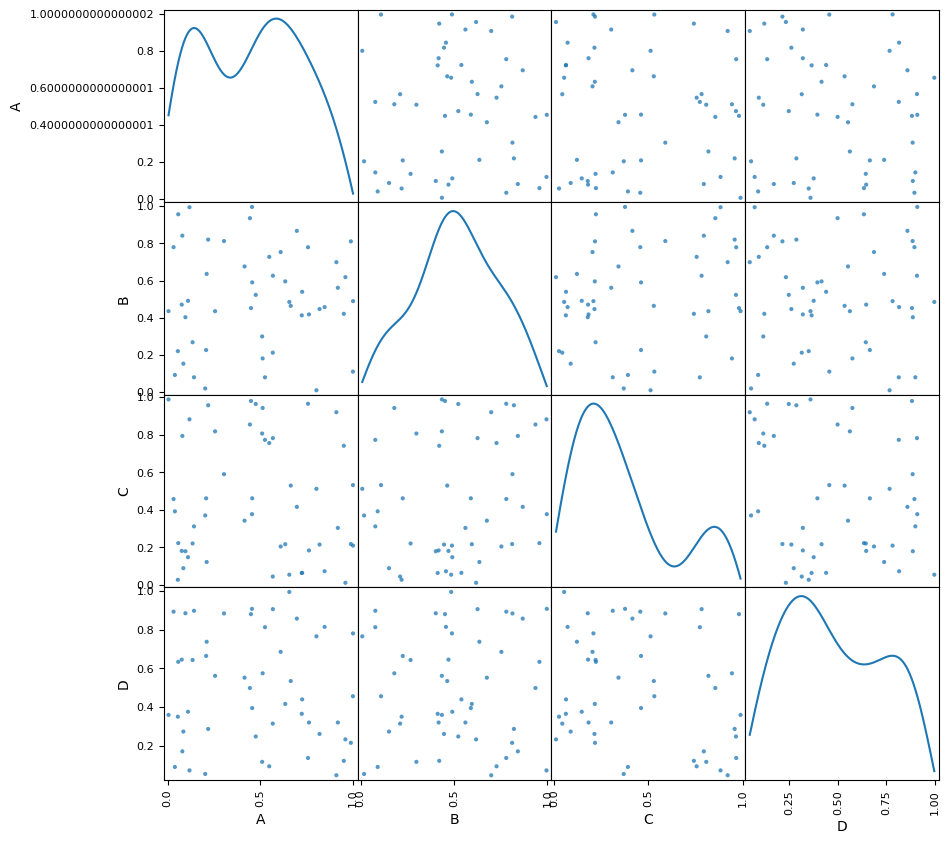

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot a scatter matrix with correlation coefficients
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Keep only numerical columns
    df = df.dropna(axis=1)  # Drop columns with NaNs
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns with more than 1 unique value
    columnNames = list(df)
    if len(columnNames) > 10:  # Limit the number of columns for readability
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax[0], k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i,j]:.3f}', (0.5, 0.9), xycoords='axes fraction', ha='center', va='center', fontsize=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


# Call the function with example parameters
plotScatterMatrix(df, plotSize=10, textSize=10)


In [89]:
good_ingredients = ['kale', 'quinoa', 'blueberries']  # Example good ingredients
bad_ingredients = ['sugar', 'butter']  # Example bad ingredients

# Filter method to check if a recipe has good ingredients and doesn't have bad ingredients
def filter_recipes(recipe):
    return any(good in recipe for good in good_ingredients) and not any(bad in recipe for bad in bad_ingredients)

# Apply the filter to get a subset of recipes
filtered_df = df[df['Cleaned_Ingredients'].apply(filter_recipes)]

# Assuming you have a favorite recipe titled "Favorite Recipe"
recommendations = recommend_recipes("Title", cosine_sim)

# Filter recommendations based on good/bad ingredients
final_recommendations = recommendations[recommendations.apply(filter_recipes)]
print(final_recommendations)


Recipe title not found in the dataset.


AttributeError: 'list' object has no attribute 'apply'

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'Cleaned_Ingredients' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Ingredients'])

# tfidf_matrix will now contain a numerical representation of the importance of each ingredient across all recipes.


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the recipe that matches the title
    idx = df[df['Title'] == title].index[0]

    # Get the pairwsie similarity scores of all recipes with that recipe
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the recipes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar recipes
    top_indices = [i[0] for i in sim_scores[1:11]]

    # Return the top 10 most similar recipes
    return df['Title'].iloc[top_indices]


In [92]:
def filter_recipes_by_ingredient(preferences):
    # Filter recipes based on user preferences
    # preferences is a dict with keys 'include' and 'exclude' pointing to lists of ingredients
    filtered_df = df[df['Cleaned_Ingredients'].apply(lambda x: all(item in x for item in preferences['include']) and not any(item in x for item in preferences['exclude']))]
    return filtered_df

# Example usage:
user_preferences = {
    'include': ['kale', 'quinoa'],
    'exclude': ['sugar', 'butter']
}
filtered_recipes = filter_recipes_by_ingredient(user_preferences)
print(filtered_recipes['Title'])


825     Grilled Chicken and Quinoa with Matcha Dressing
1334                         Avocado-Miso-Mushroom Bowl
1454                                    Grain Bowl Soup
3786               Superfood Coconut Curry Salmon Salad
5926    Quinoa Salad with Kale, Pine Nuts, and Parmesan
Name: Title, dtype: object


In [99]:
good_ingredients = ['kale', 'quinoa', 'blueberries', 'spinach', 'almonds', 'salmon', 'avocado', 'sweet potatoes', 'garlic', 'ginger']
occasional_ingredients = ['pasta', 'rice', 'bread', 'potatoes', 'cheese', 'red meat']
avoid_ingredients = ['sugar', 'butter', 'high-fructose corn syrup', 'trans fats', 'artificial sweeteners', 'processed foods', 'fried foods']

def categorize_recipes(ingredients_str):
    # Assuming ingredients_str is a stringified list; convert it back to a list
    try:
        ingredients = ast.literal_eval(ingredients_str)
    except ValueError:
        # Fallback if conversion fails; adjust based on your data's structure
        ingredients = [ingredients_str]

    # Initialize counts
    good_count = sum(1 for ingredient in ingredients if any(good in ingredient for good in good_ingredients))
    occasional_count = sum(1 for ingredient in ingredients if any(occasional in ingredient for occasional in occasional_ingredients))
    avoid_count = sum(1 for ingredient in ingredients if any(avoid in ingredient for avoid in avoid_ingredients))

    # Categorization logic could be adjusted based on your specific criteria
    if avoid_count > 0:
        return 'Foods to Avoid'
    elif good_count >= occasional_count:
        return 'Foods to Eat'
    else:
        return 'Foods to Eat Occasionally'
# Update the category for each recipe
df['category'] = df['Cleaned_Ingredients'].apply(categorize_recipes)


In [97]:
from IPython.display import HTML, display
import pandas as pd
from itertools import cycle

# Assuming `df` is your dataset with recipes, ingredients, and potentially user preferences

# Example function to categorize recipes based on predefined nutritional guidelines or preferences
def categorize_recipes(recipe):
    if 'kale' in recipe['Cleaned_Ingredients']:
        return 'Foods to Eat'
    elif 'sugar' in recipe['Cleaned_Ingredients']:
        return 'Foods to Avoid'
    else:
        return 'Foods to Eat Occasionally'

# Adding a new column for category based on the categorize_recipes function
df['category'] = df.apply(categorize_recipes, axis=1)

# Function to display recommendations
def display_food_recommendations(df, num_categories=3, num_recommendations=5):
    color_palette = ["#FFB6C1", "#ADD8E6", "#90EE90", "#FFA07A", "#20B2AA", "#778899", "#DAA520"]
    color_cycle = cycle(color_palette)
    
    html_str = "<div style='width: 100%;'>"
    categories = df['category'].unique()
    
    for category in categories:
        category_color = next(color_cycle)  # Cycle through colors for each category
        recommendations = df[df['category'] == category].sample(n=num_recommendations)['Title'].tolist()
        
        html_str += f"<h2>{category}</h2><div style='display: flex; flex-wrap: wrap; gap: 10px;'>"
        for recommendation in recommendations:
            # Display each recommendation in a 'tile' with the category color
            html_str += f"<div style='min-width: 150px; padding: 10px; background-color: {category_color}; color: #000; text-align: center; border-radius: 10px;'>{recommendation}</div>"
        html_str += "</div><br>"
    
    html_str += "</div>"
    display(HTML(html_str))

# Displaying the categorized food recommendations
display_food_recommendations(df)


In [48]:
import requests

def get_nutritional_info(ingredient):
    api_url = "https://api.nal.usda.gov/fdc/v1/foods/search"
    params = {
        "query": ingredient,
        "api_key": "pMLeIW9BhKSckb6M7KvdgqGkhn7anXQ7YoWS8fwP"
    }
    response = requests.get(api_url, params=params)
    data = response.json()
    # Parse and return the desired nutritional information
    return data


In [101]:
import pandas as pd
import requests

def fetch_nutritional_info(ingredient):
    # Example function to fetch nutritional info
    pass

def categorize_recipe(recipe):
    categories = {}
    # Implement logic for each categorization based on recipe data
    # This involves setting conditions and criteria for each category
    return categories

# Assuming df is your DataFrame containing recipe data
df['categories'] = df.apply(lambda row: categorize_recipe(row), axis=1)


In [104]:
from IPython.display import HTML, display
import pandas as pd
from itertools import cycle

# Sample DataFrame initialization (replace with your actual DataFrame loading code)
# df = pd.read_csv('path_to_your_dataset.csv')

# Expanded example function to categorize recipes based on a more comprehensive set of criteria
def categorize_recipes(row):
    categories = []
    ingredients = row['Cleaned_Ingredients']  # Assuming this is a string of comma-separated ingredients

    # Example checks for different categories
    if any(ingredient in ingredients for ingredient in ['kale', 'quinoa', 'blueberries']):
        categories.append('Foods to Eat')
    if any(ingredient in ingredients for ingredient in ['sugar', 'butter']):
        categories.append('Foods to Avoid')
    # Add more conditions for other categories as needed

    return ', '.join(categories) if categories else 'Foods to Eat Occasionally'

# Apply the categorization function
df['category'] = df.apply(categorize_recipes, axis=1)

def display_food_recommendations(df, num_categories=3, num_recommendations=5):
    color_palette = ["#FFB6C1", "#ADD8E6", "#90EE90", "#FFA07A", "#20B2AA", "#778899", "#DAA520"]
    color_cycle = cycle(color_palette)
    
    html_str = "<div style='width: 100%;'>"
    # Splitting categories for each recipe into a list, then flattening the list and getting unique categories
    all_categories = set(category for sublist in df['category'].str.split(', ').tolist() for category in sublist)
    
    for category in all_categories:
        category_color = next(color_cycle)  # Cycle through colors for each category
        # Filtering recipes that contain the current category in their category list
        recommendations = df[df['category'].str.contains(category)].sample(n=min(num_recommendations, len(df))).get('Title', []).tolist()
        
        html_str += f"<h2>{category}</h2><div style='display: flex; flex-wrap: wrap; gap: 10px;'>"
        for recommendation in recommendations:
            # Display each recommendation in a 'tile' with the category color
            html_str += f"<div style='min-width: 150px; padding: 10px; background-color: {category_color}; color: #000; text-align: center; border-radius: 10px;'>{recommendation}</div>"
        html_str += "</div><br>"
    
    html_str += "</div>"
    display(HTML(html_str))

# Ensure your DataFrame 'df' is correctly loaded and structured before calling this function
# display_food_recommendations(df)


In [108]:
from IPython.display import HTML, display
import pandas as pd
from itertools import cycle

# Sample DataFrame initialization
# Replace with your actual DataFrame loading code
# df = pd.read_csv('path_to_your_dataset.csv')

# Expanded function to categorize recipes
def categorize_recipes(row):
    categories = []
    
    # Nutritional Content Categorization
    if 'quinoa' in row['Cleaned_Ingredients']:
        categories.append('High Protein')
    if 'avocado' in row['Cleaned_Ingredients']:
        categories.append('Heart Healthy')
    
    # Diet-Specific Categorization
    if 'tofu' in row['Cleaned_Ingredients']:
        categories.append('Vegan')
    
    # Foods to Eat / Avoid / Eat Occasionally
    if 'kale' in row['Cleaned_Ingredients']:
        categories.append('Foods to Eat')
    if 'sugar' in row['Cleaned_Ingredients']:
        categories.append('Foods to Avoid')
    else:
        categories.append('Foods to Eat Occasionally')
    
    # Add checks for other categorizations as needed
    
    # Placeholder for other categories
    categories.extend(['Seasonal', 'User Favorite', 'Quick Meals', 'Low Sodium'])  # Example additions

    return ', '.join(set(categories))  # Remove duplicates and join

# Apply the categorization function
df['categories'] = df.apply(categorize_recipes, axis=1)

# Function to display recommendations
def display_food_recommendations(df, num_categories=3, num_recommendations=5):
    color_palette = ["#FFB6C1", "#ADD8E6", "#90EE90", "#FFA07A", "#20B2AA", "#778899", "#DAA520"]
    color_cycle = cycle(color_palette)
    
    html_str = "<div style='width: 100%;'>"
    # Split and flatten the categories from all recipes to get a unique list
    all_categories = set(cat.strip() for sublist in df['categories'].str.split(',').tolist() for cat in sublist)
    
    for category in all_categories:
        category_color = next(color_cycle)  # Cycle through colors for each category
        # Filtering to get recipes for this category; refine logic for better accuracy
        recommendations = df[df['categories'].str.contains(category, na=False)].sample(n=num_recommendations)['Title'].tolist()
        
        html_str += f"<h2>{category}</h2><div style='display: flex; flex-wrap: wrap; gap: 10px;'>"
        for recommendation in recommendations:
            html_str += f"<div style='min-width: 150px; padding: 10px; background-color: {category_color}; color: #000; text-align: center; border-radius: 10px;'>{recommendation}</div>"
        html_str += "</div><br>"
    
    html_str += "</div>"
    display(HTML(html_str))

# Ensure your DataFrame 'df' is correctly loaded and structured before calling this function
display_food_recommendations(df)


In [110]:
from IPython.display import HTML, display
import pandas as pd
from itertools import cycle
import requests
import ast

# Mock function to simulate fetching nutritional info from an API
def fetch_nutritional_info(ingredient):
    # Placeholder for API call to fetch nutritional data
    # Example response structure based on assumed API response
    nutritional_data = {
        'protein': 5,  # grams per 100g
        'carbs': 20,   # grams per 100g
        'fat': 1,      # grams per 100g
        'fiber': 2,    # grams per 100g
        'sodium': 50   # mg per 100g
    }
    return nutritional_data

# Expanded categorization function considering more detailed criteria
def categorize_recipes(row):
    categories = []
    
    try:
        ingredients = ast.literal_eval(row['Cleaned_Ingredients'])
    except ValueError:
        ingredients = [row['Cleaned_Ingredients']]
    
    # Example categorization logic
    for ingredient in ingredients:
        nutrition = fetch_nutritional_info(ingredient)
        
        if nutrition['fiber'] > 5:
            categories.append('High Fiber')
        if nutrition['protein'] > 10:
            categories.append('High Protein')
        if nutrition['sodium'] < 40:
            categories.append('Low Sodium')
        # Extend with more conditions based on nutritional data

    # Example static categorizations based on ingredient names
    if any('kale' in ing for ing in ingredients):
        categories.append('Foods to Eat')
    if any('sugar' in ing for ing in ingredients):
        categories.append('Foods to Avoid')
    # Add more conditions as needed

    return ', '.join(categories) if categories else 'General'

# Assuming df is your DataFrame and it has a 'Cleaned_Ingredients' column
# df['categories'] = df.apply(categorize_recipes, axis=1)

def display_food_recommendations(df, num_recommendations=5):
    color_palette = cycle(["#FFB6C1", "#ADD8E6", "#90EE90", "#FFA07A", "#20B2AA", "#778899", "#DAA520", "#F08080"])
    
    html_str = "<div style='width: 100%;'>"
    all_categories = set(cat.strip() for sublist in df['categories'].str.split(',').tolist() for cat in sublist)
    
    for category in all_categories:
        category_color = next(color_palette)
        recommendations = df[df['categories'].str.contains(category, na=False)].sample(n=num_recommendations).get('Title', []).tolist()
        
        html_str += f"<h2>{category}</h2><div style='display: flex; flex-wrap: wrap; gap: 10px;'>"
        for recommendation in recommendations:
            html_str += f"<div style='min-width: 150px; padding: 10px; background-color: {category_color}; color: #000; text-align: center; border-radius: 10px;'>{recommendation}</div>"
        html_str += "</div><br>"
    
    html_str += "</div>"
    display(HTML(html_str))

# Example usage; ensure your DataFrame 'df' is defined and structured correctly before using it
display_food_recommendations(df)


In [114]:
from IPython.display import HTML, display
import pandas as pd
from itertools import cycle
import requests
import ast

# Mock function to simulate fetching nutritional info from an API
def fetch_nutritional_info(ingredient):
    # Placeholder for API call to fetch nutritional data
    # Example response structure based on assumed API response
    nutritional_data = {
        'protein': 5,  # grams per 100g
        'carbs': 20,   # grams per 100g
        'fat': 1,      # grams per 100g
        'fiber': 2,    # grams per 100g
        'sodium': 50   # mg per 100g
    }
    return nutritional_data

# Expanded categorization function considering more detailed criteria
def categorize_recipes(row):
    categories = []
    
    try:
        ingredients = ast.literal_eval(row['Cleaned_Ingredients'])
    except ValueError:
        ingredients = [row['Cleaned_Ingredients']]
    
    # Example categorization logic
    for ingredient in ingredients:
        nutrition = fetch_nutritional_info(ingredient)
        
        if nutrition['fiber'] > 5:
            categories.append('High Fiber')
        if nutrition['protein'] > 10:
            categories.append('High Protein')
        if nutrition['sodium'] < 40:
            categories.append('Low Sodium')
        # Extend with more conditions based on nutritional data

    # Example static categorizations based on ingredient names
    if any('kale' in ing for ing in ingredients):
        categories.append('Foods to Eat')
    if any('sugar' in ing for ing in ingredients):
        categories.append('Foods to Avoid')
    # Add more conditions as needed

    return ', '.join(categories) if categories else 'General'

# Assuming df is your DataFrame and it has a 'Cleaned_Ingredients' column
# df['categories'] = df.apply(categorize_recipes, axis=1)

def display_food_recommendations(df, num_recommendations=5):
    color_palette = cycle(["#FFB6C1", "#ADD8E6", "#90EE90", "#FFA07A", "#20B2AA", "#778899", "#DAA520", "#F08080"])
    
    html_str = "<div style='width: 100%;'>"
    all_categories = set(cat.strip() for sublist in df['categories'].str.split(',').tolist() for cat in sublist)
    
    for category in all_categories:
        category_color = next(color_palette)
        recommendations = df[df['categories'].str.contains(category, na=False)].sample(n=num_recommendations).get('Title', []).tolist()
        
        html_str += f"<h2>{category}</h2><div style='display: flex; flex-wrap: wrap; gap: 10px;'>"
        for recommendation in recommendations:
            html_str += f"<div style='min-width: 150px; padding: 10px; background-color: {category_color}; color: #000; text-align: center; border-radius: 10px;'>{recommendation}</div>"
        html_str += "</div><br>"
    
    html_str += "</div>"
    display(HTML(html_str))

# Example usage; ensure your DataFrame 'df' is defined and structured correctly before using it
display_food_recommendations(df)


Conclusion
In conclusion, the personalized food recommender system represents a convergence of technology, nutrition, and user-centric design, aiming to revolutionize the way individuals approach diet and health. Through its implementation, the project seeks to make personalized dietary advice accessible and actionable, supporting a healthier and more informed society.

This project plan sets the stage for detailed planning, development, and execution phases, where each objective will be systematically addressed to realize the vision of a comprehensive and user-friendly food recommender system.